In [2]:
#Install Libraries
import csv
import matplotlib.pyplot as plt
import copy

In [3]:
#Extract Data into parallel arrays
# Initialize empty parallel arrays
sensor_id = []
target_ppm = []
resistance = []
temperature = []
relative_humidity = []
low_interval = []
high_interval = []
ratio = []

# Open the CSV file
filename = "Output/BenSummaryJustMatrix.csv"
with open(filename, "r") as csv_file:
    # Create a CSV reader
    csv_reader = csv.DictReader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Extract data from the row and append it to the respective parallel arrays
        sensor_id.append(row["SensorID"])
        target_ppm.append(row["Target PPM"])
        resistance.append(row["Resistance"])
        temperature.append(row["Temperature"])
        relative_humidity.append(row["RelativeHumidity"])
        low_interval.append(row["lowInterval"])
        high_interval.append(row["highInterval"])
        ratio.append(row["Ratio"])

# Close the file
csv_file.close()
print("Data extracted successfully!")


Data extracted successfully!


In [4]:
#extract the data into a 2d array
filename = "Output/BenSummaryJustMatrix.csv"
two_d_data = []

with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # Read the header row

    for row in reader:
        two_d_data.append(row)

# Print the data
print(two_d_data[0])

['0', '0.0', '0.0', '7.812575228394485', '35.422920353982306', '45.221902654867264', '7.79232499225444', '7.8328254645345305', '0.27725981744813594']


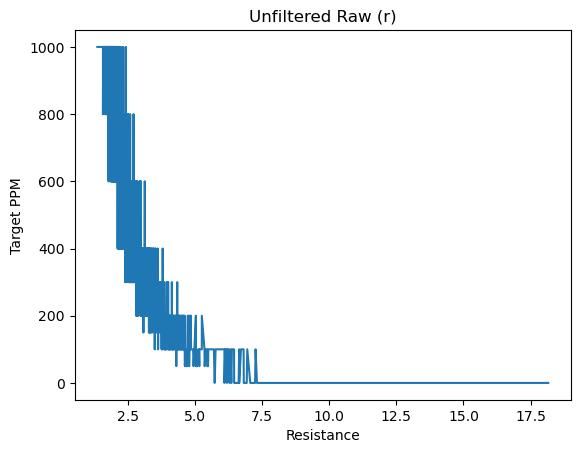

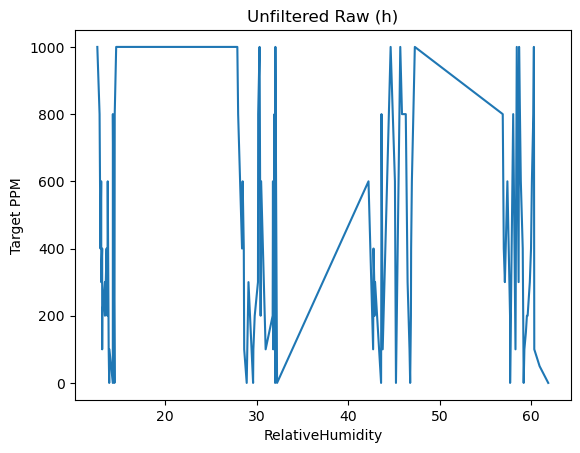

In [23]:
# Sort the data based on the second index of each row, this index represents the resistance
sorted_data_r = sorted(two_d_data, key=lambda x: float(x[3]))
sorted_data_h = sorted(two_d_data, key=lambda x: float(x[5]))

# Print the sorted data
#for row in sorted_data_h:
#    print(row[5])

# Extract the values for plotting
x = [float(row[3]) for row in sorted_data_r]
y = [float(row[2]) for row in sorted_data_r]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Unfiltered Raw (r)")
plt.show()

# Extract the values for plotting
x = [float(row[5]) for row in sorted_data_h]
y = [float(row[2]) for row in sorted_data_h]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Unfiltered Raw (h)")
plt.show()

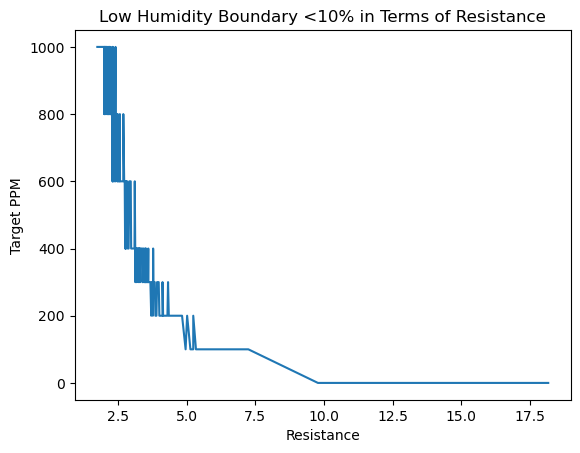

In [20]:
#attempt to delete all conditions but the boundary conditions
low_humidity = []

for row in sorted_data_r:
    if float(row[5])<20.0:
        low_humidity.append(row)
        #print(row[5])

# Extract the values for plotting
x = [float(row[3]) for row in low_humidity]
y = [float(row[2]) for row in low_humidity]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Low Humidity Boundary <10% in Terms of Resistance")
plt.show()

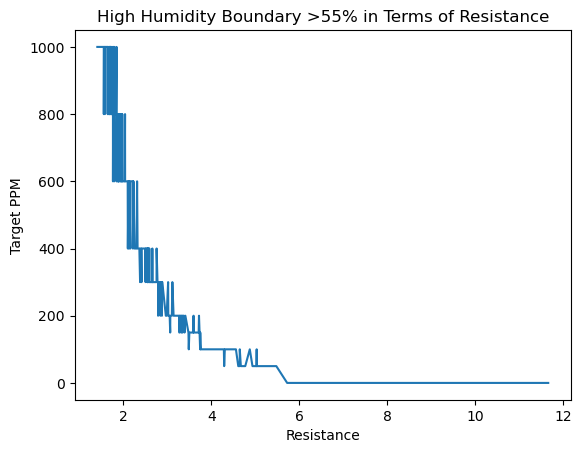

In [33]:
high_humidity = []
for row in sorted_data_r:
    if float(row[5])>55.0:
        high_humidity.append(row)
        #print(row[5])

# Extract the values for plotting
x = [float(row[3]) for row in high_humidity]
y = [float(row[2]) for row in high_humidity]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("High Humidity Boundary >55% in Terms of Resistance")
plt.show()

118 Samples Taken


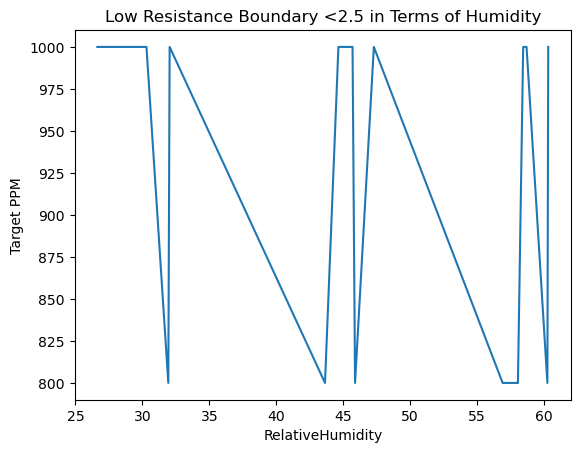

In [37]:
low_resistance = []
i = 0
for row in sorted_data_h:
    if float(row[3])<1.7:
        low_resistance.append(row)
        i+=1
        #print(row[3])
print(str(i)+" Samples Taken")
# Extract the values for plotting
x = [float(row[5]) for row in low_resistance]
y = [float(row[2]) for row in low_resistance]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Low Resistance Boundary <2.5 in Terms of Humidity")
plt.show()

182 Samples Taken


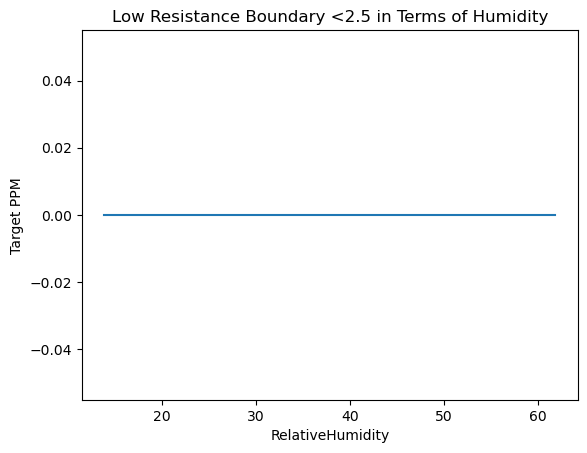

In [39]:
high_resistance = []
i = 0
for row in sorted_data_h:
    if float(row[3])>7.5:
        high_resistance.append(row)
        i+=1
        #print(row[3])
print(str(i)+" Samples Taken")

# Extract the values for plotting
x = [float(row[5]) for row in high_resistance]
y = [float(row[2]) for row in high_resistance]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Low Resistance Boundary <2.5 in Terms of Humidity")
plt.show()